In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_data = pd.read_csv('XYZCorp_LendingData.txt',delimiter='\t',parse_dates=['issue_d'],low_memory=False)

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
data_null = loan_data.isnull().sum()
data_null = data_null[data_null.values>(0.8*len(loan_data))]

In [5]:
loan_data = loan_data.drop(labels=list(data_null.index),axis=1)

In [6]:
data_null.count()

19

# Exploratory Data Analysis

Target Variable

In [7]:
loan_data['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

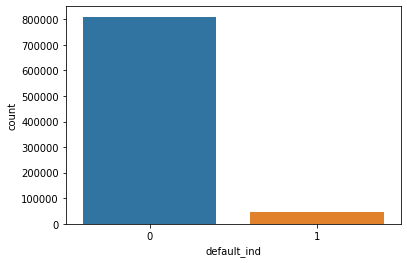

In [8]:
sns.countplot('default_ind',data=loan_data)

Categorical Variable

In [9]:
loan_data['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

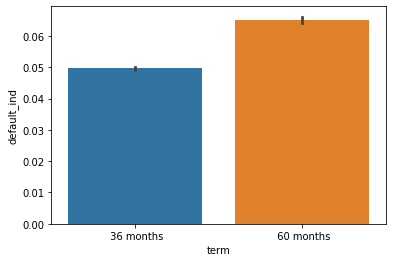

In [10]:
sns.barplot(x='term',y='default_ind',data=loan_data)

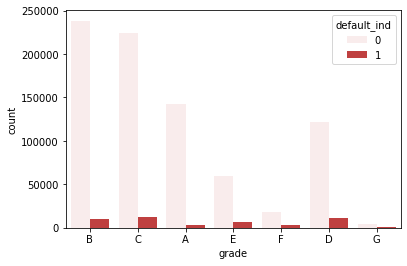

In [11]:
sns.countplot('grade',data=loan_data,hue='default_ind',color='red',saturation=0.5)

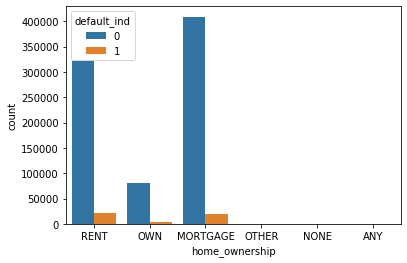

In [12]:
sns.countplot('home_ownership',data=loan_data,hue='default_ind')

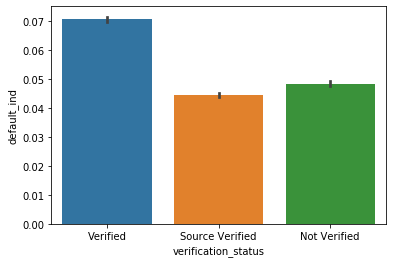

In [13]:
sns.barplot(x="verification_status", y="default_ind", data=loan_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

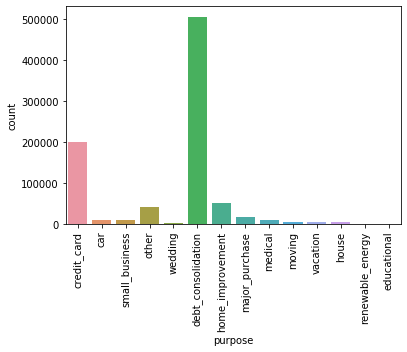

In [14]:
sns.countplot(loan_data['purpose'])
plt.xticks(rotation=90)


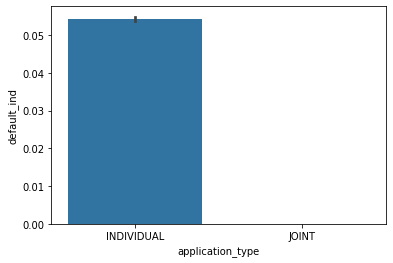

In [15]:
sns.barplot(x='application_type',y='default_ind',data=loan_data)

<function matplotlib.pyplot.show(*args, **kw)>

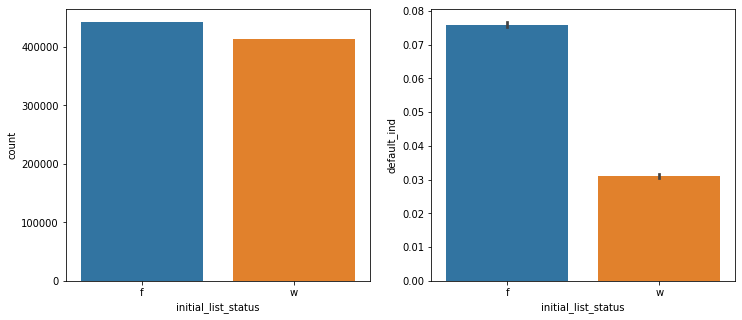

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan_data['initial_list_status'])
plt.subplot(1,2,2)
sns.barplot(x='initial_list_status', y='default_ind', data=loan_data)
plt.show

Numeric Variables

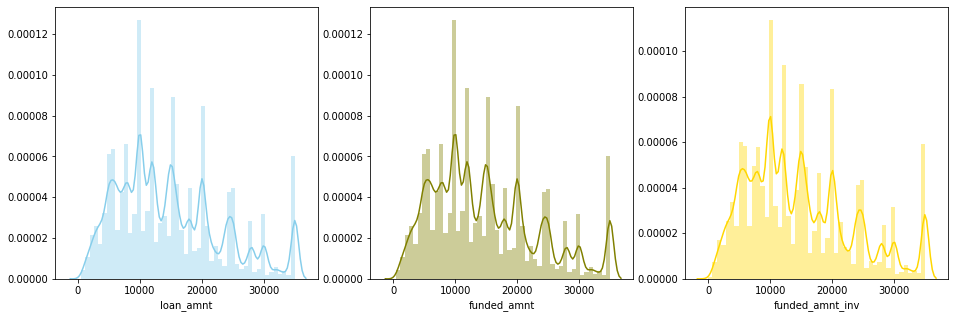

In [17]:
f, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True)
sns.distplot(loan_data['loan_amnt'] , color='skyblue', ax=axes[0])
sns.distplot(loan_data['funded_amnt'] , color='olive', ax=axes[1])
sns.distplot(loan_data['funded_amnt_inv'] , color='gold', ax=axes[2])

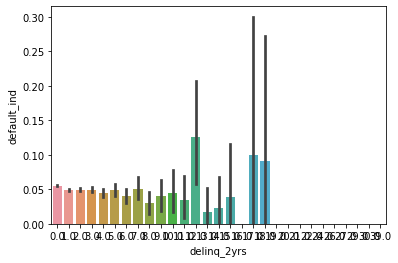

In [18]:
sns.barplot(x="delinq_2yrs", y="default_ind", data=loan_data)

(array([ 86274., 144315., 154676., 192115., 119420.,  95011.,  30806.,
         22093.,  10114.,   1145.]),
 array([ 5.32 ,  7.687, 10.054, 12.421, 14.788, 17.155, 19.522, 21.889,
        24.256, 26.623, 28.99 ]),
 <a list of 10 Patch objects>)

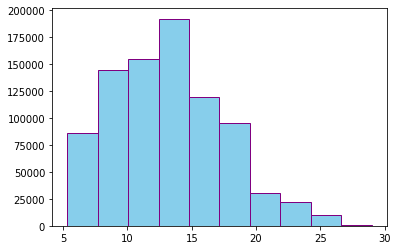

In [19]:
plt.hist(loan_data['int_rate'],facecolor='skyblue',edgecolor='purple')

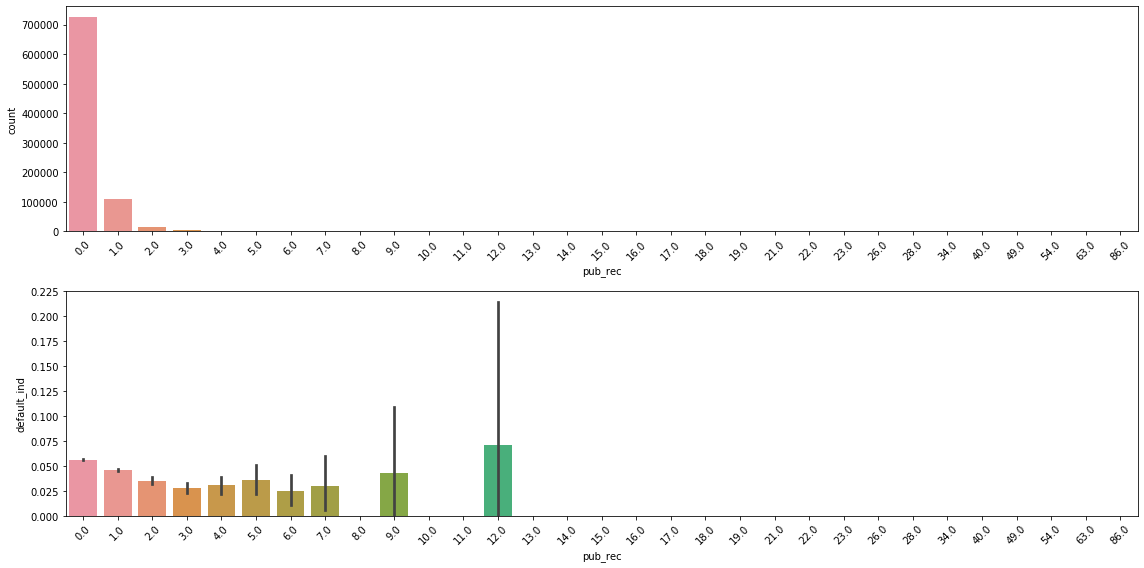

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(loan_data["pub_rec"])
plt.xticks(rotation='45')
plt.subplot(2,1,2)
sns.barplot(x="pub_rec", y="default_ind", data=loan_data)
plt.xticks(rotation='45')
plt.tight_layout()
plt.show()

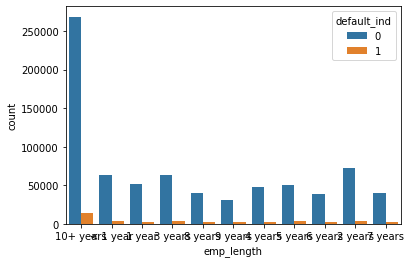

In [21]:
sns.countplot('emp_length',data=loan_data,hue='default_ind')

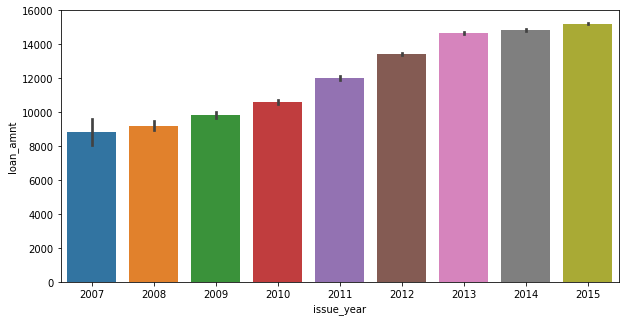

In [22]:
#year wise prediction
plt.figure(figsize=(10,5))
loan_data['issue_year'] = loan_data['issue_d'].dt.year
sns.barplot(x='issue_year',y='loan_amnt',data=loan_data)

# Feature engineering

Outliers

In [7]:
unique = loan_data.nunique()
unique = unique[unique.values==1]
unique

policy_code    1
dtype: int64

In [8]:
#drop unique value column
loan_data=loan_data.drop(labels=list(unique.index),axis=1)

In [9]:
data_num = loan_data.select_dtypes(include = ['float64', 'int64'])
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 34 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
int_rate                       855969 non-null float64
installment                    855969 non-null float64
annual_inc                     855969 non-null float64
dti                            855969 non-null float64
delinq_2yrs                    855969 non-null float64
inq_last_6mths                 855969 non-null float64
mths_since_last_delinq         416157 non-null float64
open_acc                       855969 non-null float64
pub_rec                        855969 non-null float64
revol_bal                      855969 non-null float64
revol_util                     855523 non-null float64
total_acc    

Categorical variables

In [10]:
loan_data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

term                        2
grade                       7
sub_grade                  35
emp_title              290912
emp_length                 11
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   60991
zip_code                  931
addr_state                 51
earliest_cr_line          697
initial_list_status         2
last_pymnt_d               97
next_pymnt_d                3
last_credit_pull_d        102
application_type            2
dtype: int64

In [11]:
# Dropping the columns which has more number of categories
del_cat_cols = ['sub_grade','verification_status','purpose','emp_title','title','zip_code','addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [12]:
loan_data = loan_data.drop(del_cat_cols,axis=1)

In [13]:
loan_data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

term                    2
grade                   7
emp_length             11
home_ownership          6
pymnt_plan              2
initial_list_status     2
next_pymnt_d            3
application_type        2
dtype: int64

In [14]:
loan_data.pymnt_plan.value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [15]:
#pymnt_plan: 'No 'plan is assigned to most of the observatoins
loan_data = loan_data.drop(['pymnt_plan'],axis=1)

In [16]:
# dropping rest of the irrelevant columns
loan_data = loan_data.drop(['id','member_id','application_type'],axis=1)

Converting categorical to numeric

In [17]:
#since it has null values, will replace null values with 0
loan_data.emp_length.fillna(value=0,inplace=True)

In [18]:
loan_data['emp_length'].replace(to_replace='^<', value=0, inplace=True, regex=True)
loan_data['emp_length'].replace(to_replace='[^0-9]+',value='',inplace=True,regex=True)

In [19]:
loan_data.emp_length.value_counts()

10    282090
0     110658
2      75986
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [20]:
var_cat = ['emp_length','grade','term','home_ownership','next_pymnt_d','initial_list_status']

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in var_cat:
    le.fit(list(loan_data[i].values))
    loan_data[i] = le.transform(list(loan_data[i]))

In [22]:
loan_data.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                          0
home_ownership                      0
annual_inc                          0
issue_d                             0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         439812
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        446
total_acc                           0
initial_list_status                 0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_in

In [23]:
# Dropping columns which has huge Null values
del_num_cols = ['mths_since_last_delinq','mths_since_last_major_derog']
loan_data = loan_data.drop(del_num_cols,axis=1)

In [24]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,2,5,24000.0,...,0.00,0.00,171.62,3,0.0,0.0,NaN,NaN,NaN,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,0,5,30000.0,...,117.08,1.11,119.66,3,0.0,0.0,NaN,NaN,NaN,1
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,2,5,12252.0,...,0.00,0.00,649.91,3,0.0,0.0,NaN,NaN,NaN,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,2,5,49200.0,...,0.00,0.00,357.48,3,0.0,0.0,NaN,NaN,NaN,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,1,5,80000.0,...,0.00,0.00,67.79,0,0.0,0.0,NaN,NaN,NaN,0


In [25]:
print(loan_data['revol_util'].mean())
print(loan_data['total_rev_hi_lim'].mean())
print(loan_data['tot_coll_amt'].mean())
print(loan_data['tot_cur_bal'].mean())
print(loan_data['collections_12_mths_ex_med'].mean())

55.019404504615196
32163.5745255219
225.41288216915868
139766.24752870706
0.014230418278493258


In [26]:
print(loan_data['revol_util'].median())
print(loan_data['total_rev_hi_lim'].median())
print(loan_data['tot_coll_amt'].median())
print(loan_data['tot_cur_bal'].median())
print(loan_data['collections_12_mths_ex_med'].median())

55.9
23800.0
0.0
81008.5
0.0


In [27]:
loan_data['revol_util'].fillna(loan_data['revol_util'].median(), inplace=True)
loan_data['total_rev_hi_lim'].fillna(loan_data['total_rev_hi_lim'].median(), inplace=True)
loan_data['tot_coll_amt'].fillna(loan_data['tot_coll_amt'].median(), inplace=True)
loan_data['tot_cur_bal'].fillna(loan_data['tot_cur_bal'].median(), inplace=True)
loan_data['collections_12_mths_ex_med'].fillna(loan_data['collections_12_mths_ex_med'].median(),inplace=True)

# Train and test data set creation

In [28]:
#The data should be divided into train ( June 2007 - May 2015 ) and test ( June 2015 - Dec 2015 ) data.

In [29]:
store_data=loan_data.copy()
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 37 columns):
loan_amnt                     855969 non-null float64
funded_amnt                   855969 non-null float64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null int64
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null int64
emp_length                    855969 non-null int64
home_ownership                855969 non-null int64
annual_inc                    855969 non-null float64
issue_d                       855969 non-null datetime64[ns]
dti                           855969 non-null float64
delinq_2yrs                   855969 non-null float64
inq_last_6mths                855969 non-null float64
open_acc                      855969 non-null float64
pub_rec                       855969 non-null float64
revol_bal                 

In [30]:
# loan_data['issue_d']=pd.to_datetime(loan_data['issue_d'])
# quan_date = loan_data['issue_d'].quantile(0.7)

In [31]:
# train = loan_data.loc[loan_data['issue_d']<quan_date]
# train.issue_d.unique()

In [32]:
# test = loan_data.loc[loan_data['issue_d']>=quan_date]
# test.issue_d.unique()

In [33]:
#spliting dataframe into test and train set
train = loan_data[loan_data['issue_d'] < '2015-6-01'].copy()
test = loan_data[loan_data['issue_d'] >= '2015-6-01'].copy()
train = train.drop('issue_d',axis=1)
test = test.drop('issue_d',axis=1)


In [34]:
print(train.shape)
print(test.shape)

(598978, 36)
(256991, 36)


In [51]:
# #assigning y-train
# y_train = train['default_ind']
# y_test = test['default_ind']

In [52]:
# train = train.drop(['issue_d'],axis=1)
# test = test.drop(['issue_d'],axis=1)

In [53]:
# X_train = train
# X_test = test
# X_train.info()

In [35]:
X_train = train.copy()
y_train = X_train.pop('default_ind').copy()

In [36]:
X_test = test.copy()
y_test = X_test.pop('default_ind').copy()

In [37]:
loan_data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
issue_d                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
next_pymnt_d                  0
collecti

# Model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report

In [39]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100))
select.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [40]:
#checking most important features selected
imp_features = X_train.columns[(select.get_support())]
len(imp_features)

12

In [41]:
print(imp_features)

Index(['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'next_pymnt_d'],
      dtype='object')


In [42]:
rf = RandomForestClassifier() 
#Fit the model on your training data.
rf.fit(X_train, y_train) 
#And score it on your testing data.
rf.score(X_test, y_test)

C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3857022230350479

In [43]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_list = train.columns.tolist()[:-1]
# # List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: collection_recovery_fee Importance: 0.16
Variable: recoveries           Importance: 0.13
Variable: total_rec_prncp      Importance: 0.12
Variable: total_pymnt          Importance: 0.1
Variable: last_pymnt_amnt      Importance: 0.09
Variable: total_pymnt_inv      Importance: 0.07
Variable: out_prncp_inv        Importance: 0.05
Variable: next_pymnt_d         Importance: 0.05
Variable: loan_amnt            Importance: 0.04
Variable: funded_amnt          Importance: 0.04
Variable: funded_amnt_inv      Importance: 0.03
Variable: installment          Importance: 0.03
Variable: out_prncp            Importance: 0.03
Variable: int_rate             Importance: 0.01
Variable: grade                Importance: 0.01
Variable: total_rec_int        Importance: 0.01
Variable: total_rec_late_fee   Importance: 0.01
Variable: term                 Importance: 0.0
Variable: emp_length           Importance: 0.0
Variable: home_ownership       Importance: 0.0
Variable: annual_inc           Importance

In [44]:
#Dropping columns which are least importance
drop_features = ['open_acc','total_acc','revol_bal','revol_util','collections_12_mths_ex_med','total_rec_late_fee',
                 'acc_now_delinq','tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim']

In [45]:
X_train=X_train.drop(drop_features,axis=1)
X_test=X_test.drop(drop_features,axis=1)

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


99.69

In [47]:

print("confusion_matrix \n",confusion_matrix(y_test,Y_pred))
print("precision_score\t\t",precision_score(y_test,Y_pred))
print("recall_score\t\t",recall_score(y_test,Y_pred))
print("roc_auc_score \t\t",roc_auc_score(y_test,Y_pred))
print("classification_report \n",classification_report(y_test,Y_pred))

confusion_matrix 
 [[256632     48]
 [    63    248]]
precision_score		 0.8378378378378378
recall_score		 0.797427652733119
roc_auc_score 		 0.8986203247302809
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.84      0.80      0.82       311

    accuracy                           1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991



In [48]:
#KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

99.67

In [49]:
print("confusion_matrix \n",confusion_matrix(y_test,Y_pred))
print("precision_score\t\t",precision_score(y_test,Y_pred))
print("recall_score\t\t",recall_score(y_test,Y_pred))
print("roc_auc_score \t\t",roc_auc_score(y_test,Y_pred))
print("classification_report \n",classification_report(y_test,Y_pred))

confusion_matrix 
 [[236042  20638]
 [    52    259]]
precision_score		 0.012394123558405513
recall_score		 0.8327974276527331
roc_auc_score 		 0.8761969061280651
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    256680
           1       0.01      0.83      0.02       311

    accuracy                           0.92    256991
   macro avg       0.51      0.88      0.49    256991
weighted avg       1.00      0.92      0.96    256991



In [50]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [51]:
print("confusion_matrix \n",confusion_matrix(y_test,Y_pred))
print("precision_score\t\t",precision_score(y_test,Y_pred))
print("recall_score\t\t",recall_score(y_test,Y_pred))
print("roc_auc_score \t\t",roc_auc_score(y_test,Y_pred))
print("classification_report \n",classification_report(y_test,Y_pred))

confusion_matrix 
 [[ 70143 186537]
 [     1    310]]
precision_score		 0.0016591114655306212
recall_score		 0.9967845659163987
roc_auc_score 		 0.635027392822622
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.27      0.43    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.27    256991
   macro avg       0.50      0.64      0.22    256991
weighted avg       1.00      0.27      0.43    256991



In [52]:
#RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [53]:
print("confusion_matrix \n",confusion_matrix(y_test,Y_pred))
print("precision_score\t\t",precision_score(y_test,Y_pred))
print("recall_score\t\t",recall_score(y_test,Y_pred))
print("roc_auc_score \t\t",roc_auc_score(y_test,Y_pred))
print("classification_report \n",classification_report(y_test,Y_pred))

confusion_matrix 
 [[ 82078 174602]
 [     1    310]]
precision_score		 0.001772319795096963
recall_score		 0.9967845659163987
roc_auc_score 		 0.6582761850931533
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.32      0.48    256680
           1       0.00      1.00      0.00       311

    accuracy                           0.32    256991
   macro avg       0.50      0.66      0.24    256991
weighted avg       1.00      0.32      0.48    256991



In [54]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

99.61

In [55]:
print("confusion_matrix \n",confusion_matrix(y_test,Y_pred))
print("precision_score\t\t",precision_score(y_test,Y_pred))
print("recall_score\t\t",recall_score(y_test,Y_pred))
print("roc_auc_score \t\t",roc_auc_score(y_test,Y_pred))
print("classification_report \n",classification_report(y_test,Y_pred))

confusion_matrix 
 [[256628     52]
 [    64    247]]
precision_score		 0.8260869565217391
recall_score		 0.7942122186495176
roc_auc_score 		 0.8970048158854569
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.79      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.90    256991
weighted avg       1.00      1.00      1.00    256991



In [ ]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Random Forest','Decision Tree',' Stochastic Gradient Descent'],
    'Score': [ acc_knn, acc_log,acc_random_forest, acc_decision_tree,acc_sgd]})
models.sort_values(by='Score', ascending=False)